# Installing and Importing Dependencies


In [4]:
!pip3 install torch torchvision torchaudio

In [5]:
!pip3 install easyocr
!pip3 install imutils

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Read in Image, Grayscale and Blur


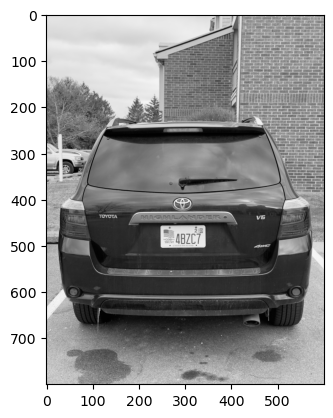

In [10]:
img = cv2.imread('../assets/image6.jpg') #reading the 
img = imutils.resize(img, width=600)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #cvtcolor, This allows us to convert single color code to different one and we use "cv2.COLOR_BGR2GRAY" because cv2 read the the image in a format of blue, green and red, then we converted it to grey
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #plt to Display the image. In genreal while ploting the image using matplotlib, it expects rgb , so thats why we use the grey conversion in the output too.

# Apply filter and find edges for localization


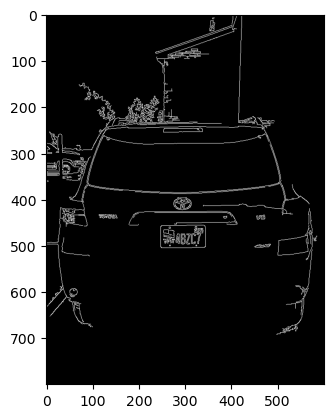

In [14]:
bfilter = cv2.bilateralFilter(gray, 90, 80, 100) # We have done "Noise reduction" by using bilateral filter method , gray in this code is we are paasing the image we wan to do noise reduction on. The numerical numbers are number of properties, for how intensively and smoothly our noise reductions wants to work.
edged = cv2.Canny(bfilter, 30, 200) #We used "Edge detection" by using canny algorithm which allows us to detect edges in the image and the numericals are where we adjust according to the visiblity of the edges according to the original image. 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)) #plt to Display the image. In genreal while ploting the image using matplotlib, it expects rgb , so thats why we use the grey conversion in the output too.

# Find Contours and Apply Mask


In [17]:
# Contour detection is detecting where the lines are , and detecting polygons within those lines (ideally shapes with in our images). In Our case we are looking for Contour which has 4 points, ideally which is we want to see a rectangle(which is the shape of a numer plate).

In [19]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #This lines tells that the contour tries to find out which shapes are ther in the image whcih we have applied edge detection too., the 1st argument is how we want to be our results to be returened, which in our case is a tree , which allows us to travrse our tree to fing different levels of contour. The 2nd argument is how we want to our results to be returned or what tyoe of results we want, by bypassing through chain approx simple, we are going ot get simplified version of the contour, This allows us to approximate what the actual contour looks like. 
contours = imutils.grab_contours(keypoints)  # we used imutils to grab our contours which simplifies how our contours are returned
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] # we soreted them and returned the Top 10 contours, we do that by specifying contourarea and reverse = true tell that we are going descending 

In [21]:
location = None #temporary Variable called Location  
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #approxPolyDP, this allows us to approximate our polygon contour
    if len(approx) == 4:
        location = approx #if it finds 4 key points, it;s most likely out number plate location
        break

In [23]:
location # we output our location, and the output is the co-ordinates of our number plate location in the imagen

array([[[343, 458]],

       [[249, 457]],

       [[247, 503]],

       [[342, 504]]], dtype=int32)

In [25]:
mask = np.zeros(gray.shape, np.uint8) # we created a blank mask np.zero, here we are basically filling it with zeros
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask) #this allows us to segment out number plate from the image

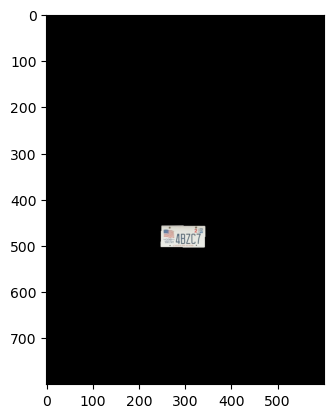

In [27]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [29]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

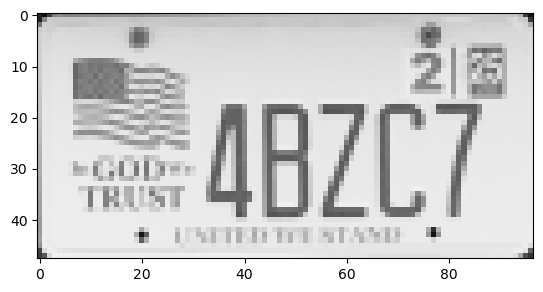

In [31]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Use Easy OCR to Read Text


In [34]:
reader = easyocr.Reader(['en']) #USing eayocr on the language we want to use
result = reader.readtext(cropped_image) #we are making to read the text form the cropped image
result # The result

[([[30, 14], [92, 14], [92, 46], [30, 46]], '4BZC7', 0.8395206168468093)]

# Render Results


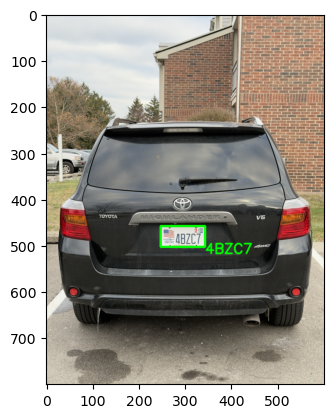

In [39]:
text = result[0][-2]  # f"{result[0][-2]} {result[1][-2]}"
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Save the image to the local system
cv2.imwrite("output_image6.jpg", res)

# Display the image
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


In [14]:
print(f"Result: {result}")

Result: [([[np.int32(30), np.int32(14)], [np.int32(92), np.int32(14)], [np.int32(92), np.int32(46)], [np.int32(30), np.int32(46)]], '4BZC7', np.float64(0.8395208345435682))]


In [15]:
if len(result) == 0:
    print("No license plate detected.")
else:
    text = result[0][-2]  # Safely access the element

In [16]:
if len(result) == 0:
    print("No license plate detected.")
else:
    if len(result[0]) > 1:
        text = result[0][-2]  # Safely access the desired element
        font = cv2.FONT_HERSHEY_SIMPLEX
        res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), 
                          fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    else:
        print("Result does not have enough elements:", result)